## Governing Equation for Discretized Multi-Phase Flow in a Porous Medium

In the following, let subscript $ i $ denote a discrete quantity defined in cell $ i $ and subscript $ ij $ denote a discrete quantity defined at the connection between two cells $ i $ and $ j $. Two cells share a connection if they are adjacent geometrically in the computational grid or share an explicit Non-Neighbor Connection (``NNC''). For example $ \upsilon_{o, ij} $ is the oil flux from cell $ i $ to cell $ j $. For oriented quantities such as fluxes, the orientation is taken to be from cell $ i $ to cell $ j $, and the quantity is skew-symmetric $ (\upsilon_{o, ij} = -\upsilon_{o, ij}) $, whereas non-oriented quantities such as the transmissibility $ T_{ij} $ are symmetric $ (T_{ij} = T_{ji}) $. Quantities with superscript $ 0 $ are taken at the start of the discrete time step, other quantities are at the end of the time step. Superscripts or subscripts applied to an expression in parenthesis apply to each element in the expression.

*For Water Phase:*

$$
R_{w,i} = \phi_{\text{{ref}},i} V_i \frac{\partial}{\partial t} \left( m_{\phi} b_w s_w \right)_i + \sum_{j \in C(i)} (b_w \lambda_w m_T)_{U_{(w,ij)}}T_{ij} (p_{w,i} - p_{w,j} - g \big(\frac{\rho_{w,i}+\rho_{w,j}}{2} \big) (z_i - z_j)) + q_{w,i} = 0
$$
*For Oil Phase:*

$$
R_{o,i} = \phi_{\text{{ref}},i} V_i \frac{\partial}{\partial t} \left( m_{\phi} (b_o s_o + r_{og} b_g s_g) \right)_i 
+ \sum_{j \in C(i)} \Big[ (b_o \lambda_o m_T)_{U_{(o,ij)}}T_{ij} (p_{o,i} - p_{o,j} - g \big(\frac{\rho_{o,i}+\rho_{o,j}}{2} \big) (z_i - z_j)) 
 + (r_{og} b_g \lambda_g m_T)_{U_{(g,ij)}}T_{ij} (p_{g,i} - p_{g,j} - g \big(\frac{\rho_{g,i}+\rho_{g,j}}{2} \big) (z_i - z_j)) \Big] 
+ q_{o,i} = 0
$$
*For Gas Phase:*

$$
R_{g,i} = \phi_{\text{{ref}},i} V_i \frac{\partial}{\partial t} \left( m_{\phi} (b_g s_g + r_{go} b_o s_o) \right)_i 
+ \sum_{j \in C(i)} \Big[ (b_g \lambda_g m_T)_{U_{(g,ij)}}T_{ij} (p_{g,i} - p_{g,j} - g \big(\frac{\rho_{g,i}+\rho_{g,j}}{2} \big) (z_i - z_j)) 
\quad + (r_{go} b_o \lambda_o m_T)_{U_{(o,ij)}}T_{ij} (p_{o,i} - p_{o,j} - g \big(\frac{\rho_{o,i}+\rho_{o,j}}{2} \big) (z_i - z_j)) \Big] 
+ q_{g,i} = 0
$$

Where the upwind direction is defined as:

$$
U(\alpha, ij) = 
\begin{cases}
i, & \text{if } \Delta \Phi_{\alpha,ij} \geq 0 \\
j, & \text{if } \Delta \Phi_{\alpha,ij} < 0  
\end{cases}
$$



### Initial Conditions

The system initiates with a constant pressure $ p_{\alpha,i} = \text{const} $ across all cells $i$.


### Nomenclature with Units
- $ \Phi_{\text{ref,i}} $: Reference porosity in cell $i$, assumed constant. [Dimensionless]
- $ V_i $: Volume of cell $i$, assumed constant. [$m^3$]
- $ m_{\phi,i} $: Pore volume multiplier as a function of pressure in cell $i$. [Dimensionless]
- $ b_i $: Formation volume factor, which relates reservoir volume to surface volume; a function of pressure. [$m^3/m^3$]
- $ C(i) $: Set of cells connected to cell $i$. [Set]
- $ \lambda $: Mobility of the water phase. [$m^2/(Pa \cdot s)$]
- $ m_{T,i} $: Transmissibility multiplier, a function of pressure in cell $i$. [Dimensionless]
- $ T_{ij} $: Transmissibility factor between cells $i$ and $j$. [$m^2/(Pa \cdot s)$]
- $ p_i $: Pressure in cell $i$. [$Pa$]
- $ T_{w,i} $: Transmissibility of the well connection in cell $i$. [$m^2/(Pa \cdot s)$]
- $ M_{i} $: Mobility of the water phase in well connection at cell $i$. [$m^2/(Pa \cdot s)$]
- $ p_{bhp,w} $: Bottomhole pressure of the well, if present. [$Pa$]
- $ g $ & gravitational acceleration in the z-direction. 
- $ z_i $ & depth of center of cell $ i $.


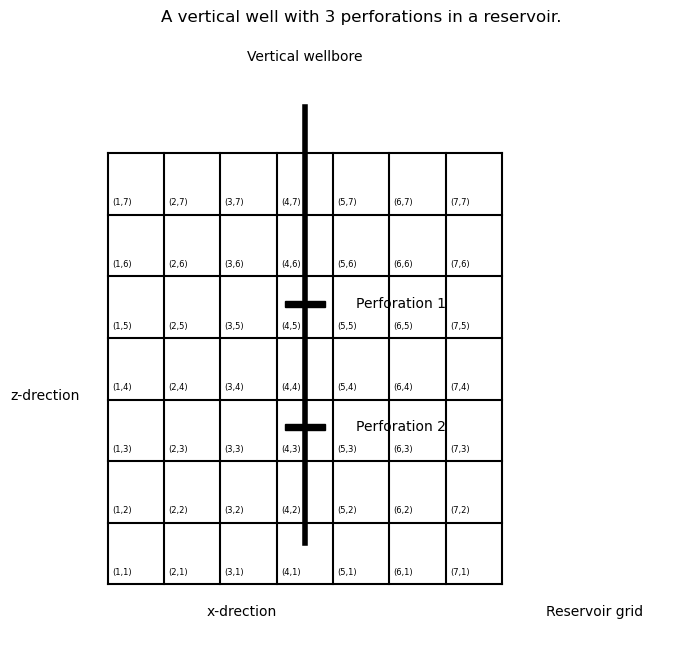

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_reservoir_with_perforations():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Reservoir grid: 7x7
    for i in range(0, 8):  
        # Vertical segments
        ax.plot([i, i], [0, 7], color='k', linestyle='-')
        # Horizontal segments
        ax.plot([0, 7], [i, i], color='k', linestyle='-')

    # Vertical wellbore, adjusted to not overlap with the bulb
    ax.axvline(x=3.5, color='k', lw=4, ymin=1/6, ymax=7/8)

    # Add grid block indices
    for i in range(1, 8):
        for j in range(1, 8):
            ax.text(i-0.75, j-0.8, f'({i},{j})', horizontalalignment='center', verticalalignment='center', fontsize=6)

    # Perforations
    perf_y_coords = [2.5, 4.5]
    perforation_width = 0.7
    for y in perf_y_coords:
        ax.add_patch(patches.Rectangle((3.5 - perforation_width/2, y), perforation_width, 0.1, color='k'))

    # Labels and title
    ax.text(6., 2.5, 'Perforation 2', horizontalalignment='right')
    ax.text(6., 4.5, 'Perforation 1', horizontalalignment='right')
    ax.text(3.5, 8.5, 'Vertical wellbore', horizontalalignment='center')
    ax.text(9.5, -0.5, 'Reservoir grid', horizontalalignment='right')
    ax.text(3, -0.5, 'x-drection', horizontalalignment='right')
    ax.text(-0.5, 3, 'z-drection', horizontalalignment='right')
    
    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 9)
    ax.axis('off')
    ax.set_title("A vertical well with 3 perforations in a reservoir.")
    
    plt.show()

plot_reservoir_with_perforations()
